# Logistic regression

## Data generation

(0.0, 10.0)

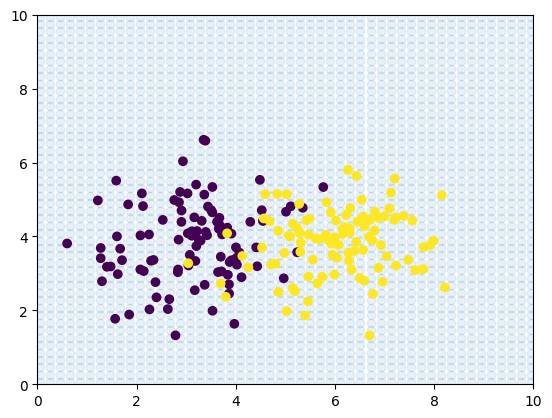

In [374]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
cov = [[1,0],
       [0,1]]

# Parts of data
c_1 = np.random.multivariate_normal([3, 4], cov, 100).T
c_2 = np.random.multivariate_normal([6, 4], cov, 100).T

# Data and parameters
x = np.concatenate([c_1.T, c_2.T])
y = np.concatenate([np.zeros(100), np.ones(100)])
N = len(y)

# Test points
gr = np.linspace(-5,15,100)
gx,gy = np.meshgrid(gr,gr)
x_grid = np.vstack([gx.flatten(),gy.flatten()]).T

# Plot
plt.scatter(x_grid[:,0],x_grid[:,1],alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlim(0,10)
plt.ylim(0,10)

# Maximum likelihood (ML)

(0.0, 10.0)

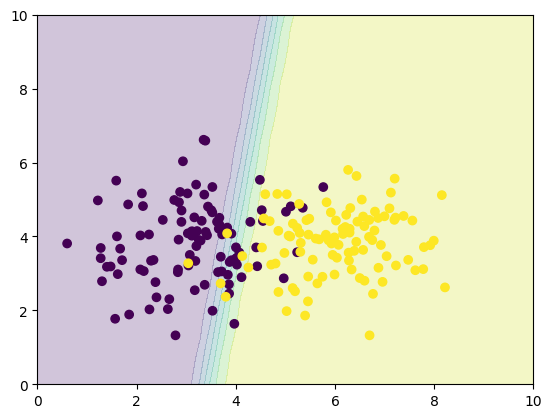

In [376]:
# Sigmoid function
def σ(a):
    u = np.exp(-np.abs(a))
    return np.where(a>0, 1/(1+u), u/(1+u))

# w calculation preparations
w = np.zeros(3)
Φ = np.hstack([np.ones((N,1)), x])
Φ_grid = np.hstack([np.ones((len(x_grid), 1)), x_grid])
η = 0.01
iters = 1000

# w calculation
for i in range(iters):
    ΔwL = Φ.T @ (y - σ(Φ @ w))
    w += η * ΔwL


# y
y_grid = σ(Φ_grid @ w)

# Plot
plt.contourf(gx,gy,y_grid.reshape(100,100),alpha=0.25)
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlim(0,10)
plt.ylim(0,10)

## Non-linear maximum likelihood

In [377]:
# Logistic regression class
class LogisticRegression:
    # Params
    w = [0]
    Φ = []
    η = 1
    iters = 100
    
    # Constructor
    def __init__(self,w,Φ,η, iters):
        self.w = w
        self.Φ = Φ
        self.η = η
        self.iters = iters
    
    # Learning parameters
    def fit(self):
        for i in range(self.iters):
            ΔwL = self.Φ.T @ (y - self.σ(self.Φ @ self.w))
            self.w += self.η * ΔwL

    
    # Predicting for dataset
    def predict(self, Φ_y):
        return self.σ(Φ_y @ self.w) 
    
    # Sigmoid function
    def σ(self, a):
        u = np.exp(-np.abs(a))
        return np.where(a>0, 1/(1+u), u/(1+u))

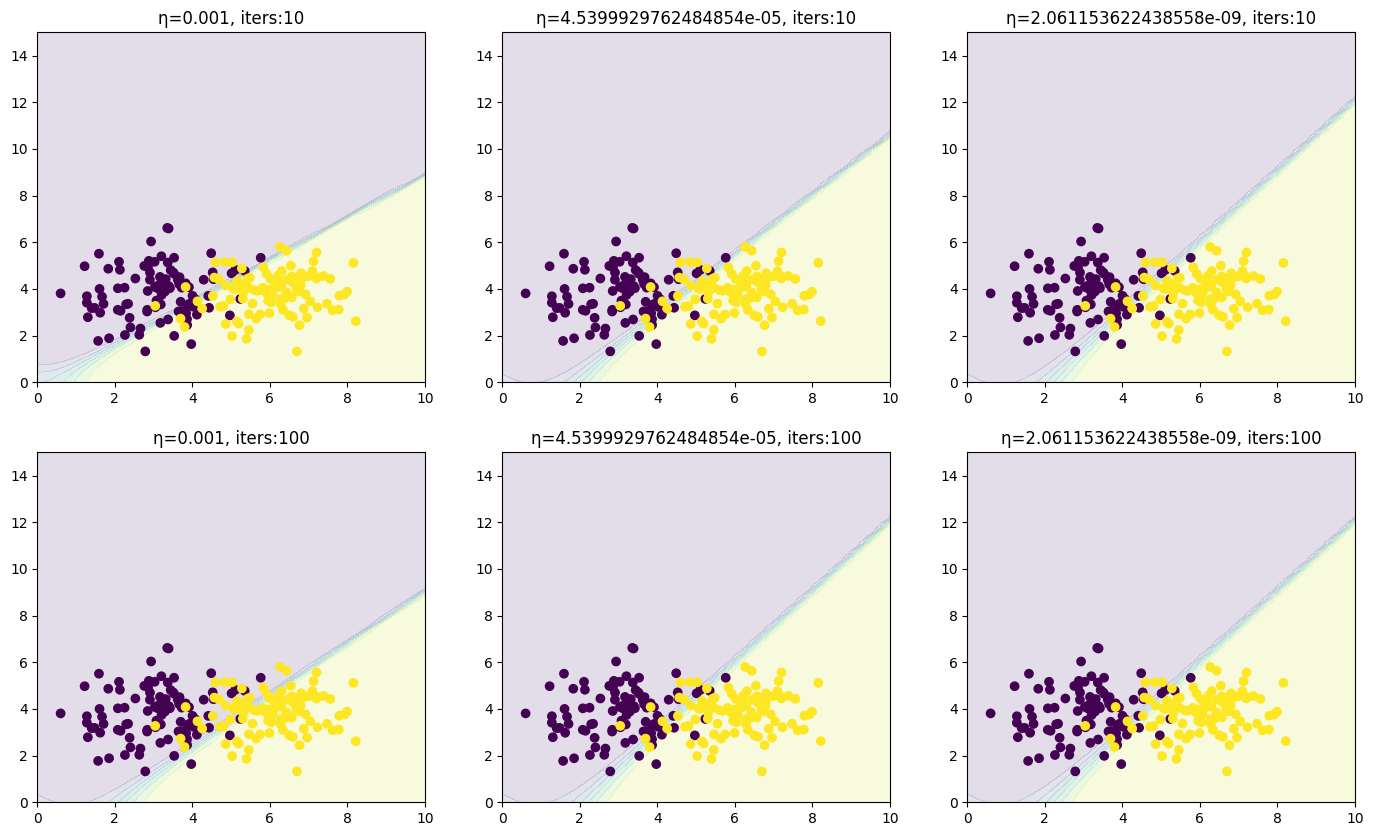

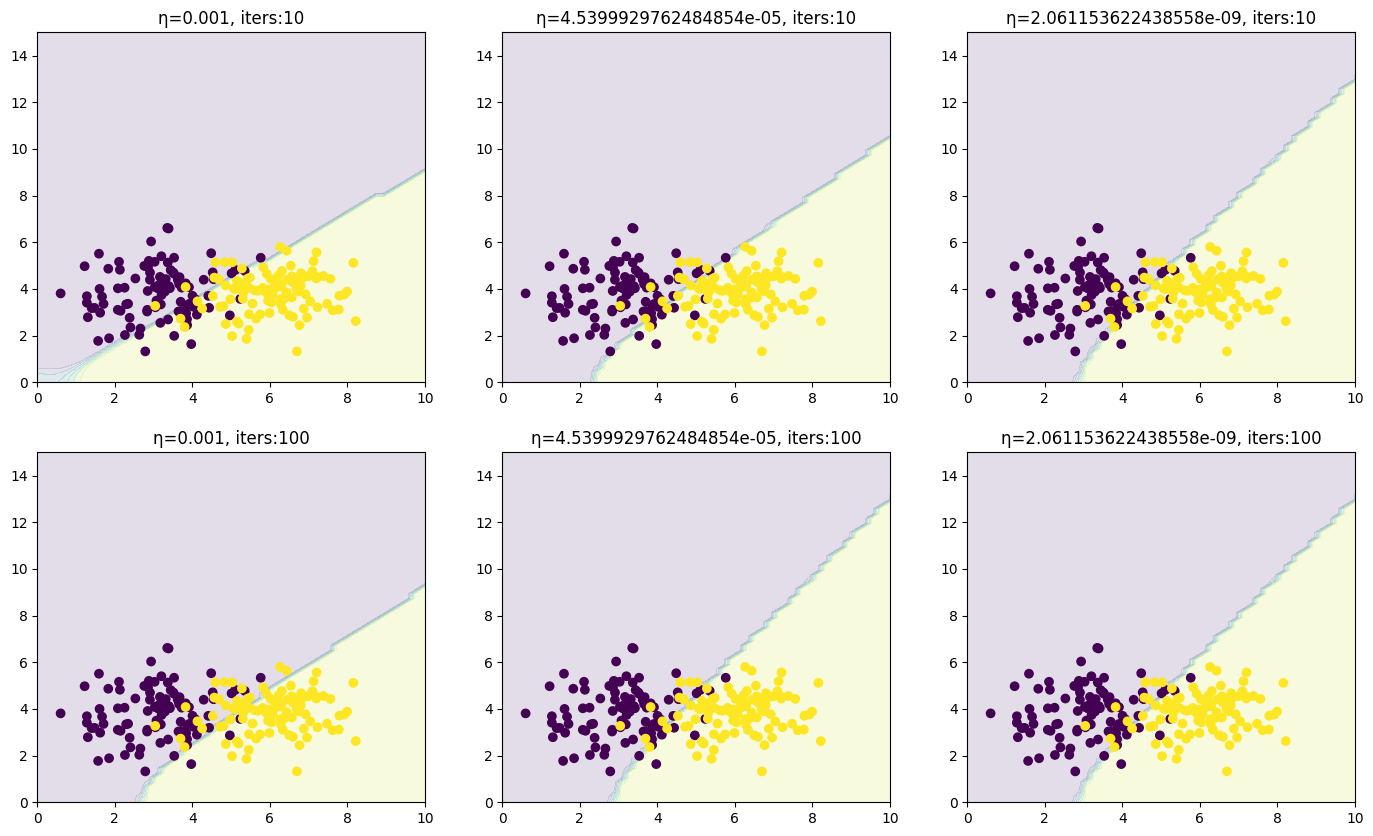

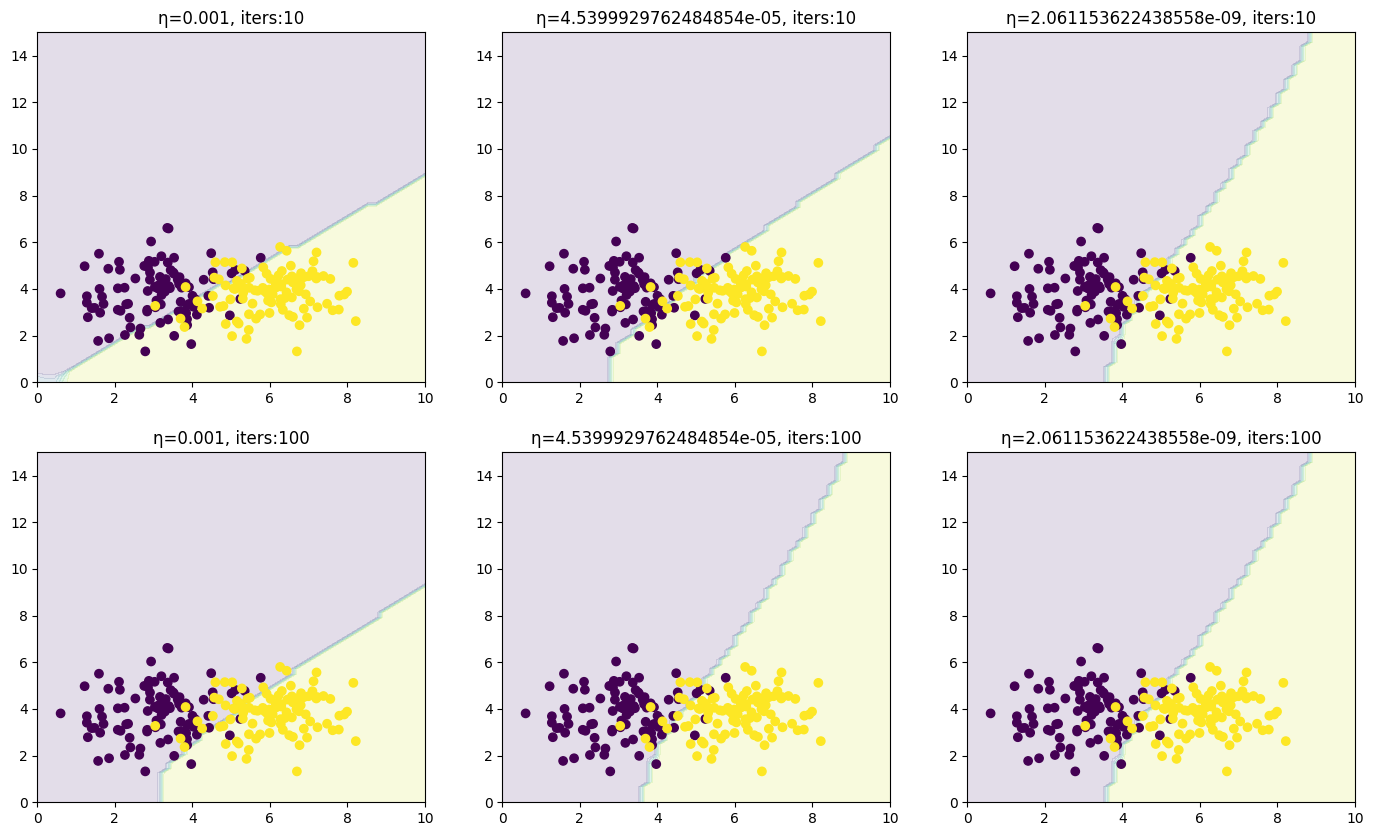

In [378]:
# Parameters for different degree polynomials
w_2 = np.zeros(5)
Φ_2 = np.hstack([np.ones((N,1)), x, x**2])
Φ_2_grid = np.hstack([np.ones((len(x_grid), 1)), x_grid, x_grid**2])

w_3 = np.zeros(7)
Φ_3 = np.hstack([np.ones((N,1)), x, x**2, x**3])
Φ_3_grid = np.hstack([np.ones((len(x_grid), 1)), x_grid, x_grid**2, x_grid**3])

w_4 = np.zeros(9)
Φ_4 = np.hstack([np.ones((N,1)), x, x**2, x**3, x**4])
Φ_4_grid = np.hstack([np.ones((len(x_grid), 1)), x_grid, x_grid**2, x_grid**3, x_grid**4])

# Param sets
params = [(w_2, Φ_2, Φ_2_grid),(w_3, Φ_3, Φ_3_grid),(w_4, Φ_4, Φ_4_grid)]


# Other parameters
η = [0.001, np.exp(-10), np.exp(-20)]
iters = [10, 100]

# Iterate different polynoms
for param in params:

    # Store results
    η_arr = []

    for η_iter in η:

        # Store results
        iters_arr = []

        # Do iters and store results with append
        for i in iters:
            logreg = LogisticRegression(param[0], param[1], η_iter, i)
            logreg.fit()
            y_grid = logreg.predict(param[2])
            iters_arr.append(np.array(y_grid))

        # Store results with append
        η_arr.append(iters_arr)

    # Plot
    fig, ax = plt.subplots(len(iters), len(η_arr), figsize=(5 * len(η_arr) + 2, 5 * len(iters)))
    for η_idx, η_value in enumerate(η_arr):
        for i_idx, i_value in enumerate(η_value):
            ax[i_idx, η_idx].contourf(gx,gy,i_value.reshape(100,100),alpha=0.15)
            ax[i_idx, η_idx].scatter(x[:,0], x[:,1], c=y)
            ax[i_idx, η_idx].set_xlim(0,10)
            ax[i_idx, η_idx].set_ylim(0,15)
            ax[i_idx, η_idx].set_title('η=' + str(η[η_idx]) + ', iters:' + str(iters[i_idx]))